In [1]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


Dataset Loaded Successfully
     Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  

Missing Values:
 Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


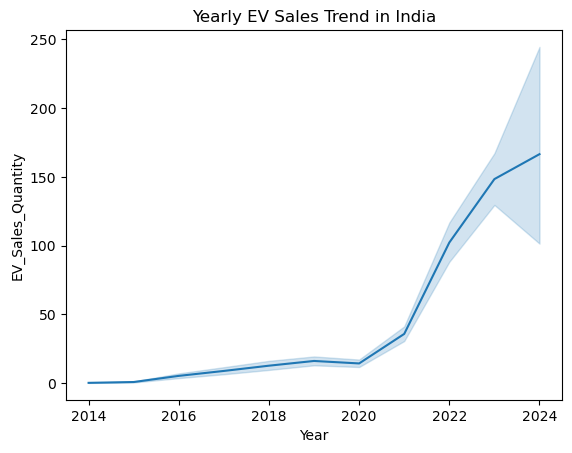

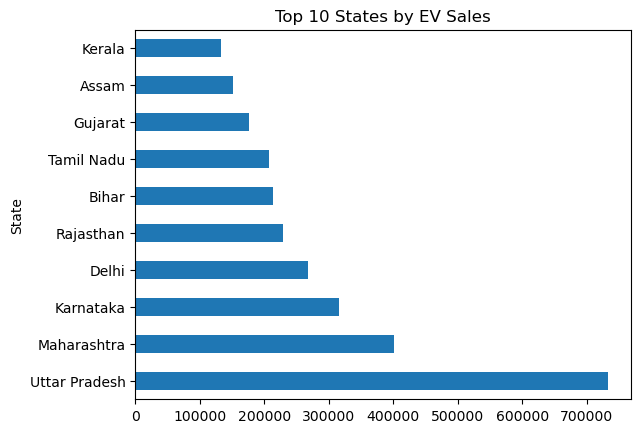

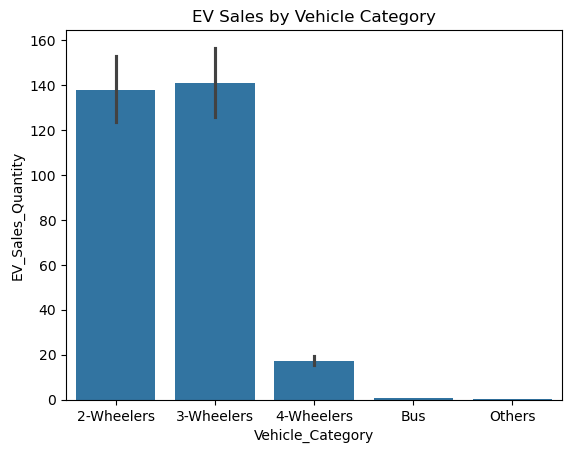


Project Execution Completed Successfully!


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("EV_Dataset.csv")
print("Dataset Loaded Successfully")
print(df.head())

# Data Cleaning
df['Year'] = df['Year'].astype(int)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert categorical columns
cat_cols = ['Month_Name','State','Vehicle_Class','Vehicle_Category','Vehicle_Type']
df[cat_cols] = df[cat_cols].astype('category')

print("\nMissing Values:\n", df.isnull().sum())

# Yearly EV Sales Trend
plt.figure()
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df)
plt.title("Yearly EV Sales Trend in India")
plt.savefig("yearly_sales.png")
plt.show()

# Top 10 States by EV Sales
top_states = df.groupby("State", observed=True)["EV_Sales_Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure()
top_states.plot(kind='barh')
plt.title("Top 10 States by EV Sales")
plt.savefig("top_states.png")
plt.show()

# Vehicle Category Analysis
plt.figure()
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=df)
plt.title("EV Sales by Vehicle Category")
plt.savefig("vehicle_category.png")
plt.show()

print("\nProject Execution Completed Successfully!")
